# Image data-processing 


Astro data need to be mapped, we need to define a pixelization grid, centered around coordinates etc... 
Most of the times images are saved in the FITS format. 

In [1]:
import astropy
import healpy as hp
import matplotlib.pyplot as plt

from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import numpy as np 
%matplotlib inline

### Let's get some _local_  data

At Osservatorio Astronomico di Catania, we have a Solar Observatory, that is every day monitoring the Sun :  http://ssa.oact.inaf.it/oact, in H-alpha and in the continuum. let's plot the two maps .




In [2]:
try : 
    halpha_2023 = fits.getdata("oact_halph_fi_20230411_053200.fts")    
    halpha_2017 = fits.getdata("oact_halph_fi_20170411_071531.fts")    
    cont_2023 = fits.getdata("oact_halph_fi_20230411_053200.fts")    
    cont_2017 = fits.getdata("oact_hared_fi_20170411_071659.fts")
    
except FileNotFoundError: 
    !wget http://solar-ct.ia2.inaf.it/ssa/20230412/fits/2023/04/11/oact_hared_fi_20230411_053322.fts
    !wget http://solar-ct.ia2.inaf.it/ssa/20230412/fits/2023/04/11/oact_halph_fi_20230411_053200.fts
    !wget http://solar-ct.ia2.inaf.it/ssa/20210101/fits/2017/04/11/oact_halph_fi_20170411_071531.fts
    !wget http://solar-ct.ia2.inaf.it/ssa/20210101/fits/2017/04/11/oact_hared_fi_20170411_071659.fts
    halpha_2023 = fits.getdata("oact_halph_fi_20230411_053200.fts")    
    halpha_2017 = fits.getdata("oact_halph_fi_20170411_071531.fts")    
    cont_2023 = fits.getdata("oact_halph_fi_20230411_053200.fts")    
    cont_2017 = fits.getdata("oact_hared_fi_20170411_071659.fts")
fits.info("oact_halph_fi_20230411_053200.fts") 

Filename: oact_halph_fi_20230411_053200.fts
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      57   (2048, 2048)   float32   


Notice that each map is now like a 2D numpy array, to plot a matrix we use `plt.imshow` and `plt.countour`  to overplot contour lines (we use this very seldom in astronomy !)  

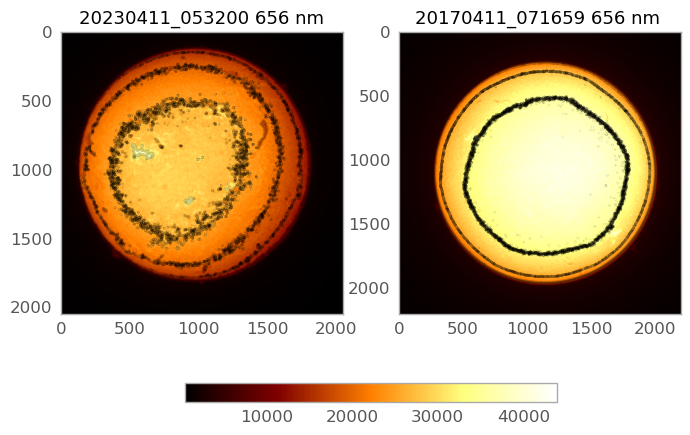

In [3]:
#plt.figure(figsize=(15,15))
fig,axs= plt.subplots(1,2)
ax = axs[0]
#plt.subplot(121)
cm= ax.imshow( (halpha_2023)  , cmap='afmhot'  )

ax.contour( (cont_2023)/ cont_2023.max(), colors='black', 
            levels=np.logspace(-.7,0, 7),
            alpha=.2 )
ax.set_title("20230411_053200 656 nm", fontsize=13)
ax.grid(False)
#plt.grid(False)
ax = axs[1]

ax.imshow( (halpha_2017)  , cmap='afmhot' )
ax.contour( (cont_2017)/cont_2017.max() , colors='black',
            levels=np.logspace(-.7,0, 7),
            alpha=.2 )

ax.set_title('20170411_071659 656 nm ', fontsize=13)
ax.grid(False)
ax.grid(False)
fig.colorbar(cm, ax=axs, shrink=0.6, location='bottom')

## Reading full sky maps
### Hierarchical Equal Area isoLatitude Pixelation (HEALPIX) of a sphere 

A pixelisation that has been more and more used is [HEALPIX](https://healpix.sourceforge.io/). We use `healpy` to read and handle full-sky maps. 
- each map is a single `numpy.array`, and the visualization routines as well as map data-reductions are adapted accordingly. 
- Healpix starts by dividing the whole celestial sphere into 12 square big pixels 
-  high-resolution  iteratively each of the big pixels encodes `nside^2`  high reso pixels, where  `nside` is how many times you have divided each side of the square into. 

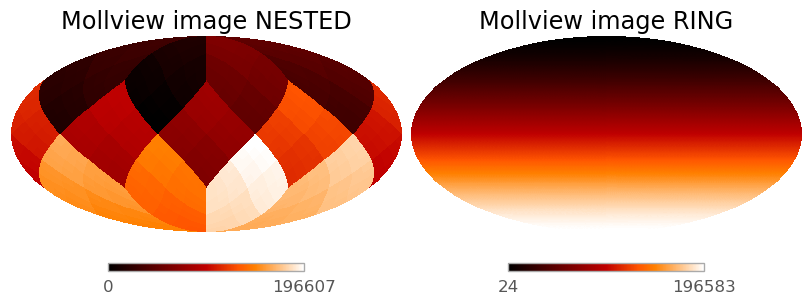

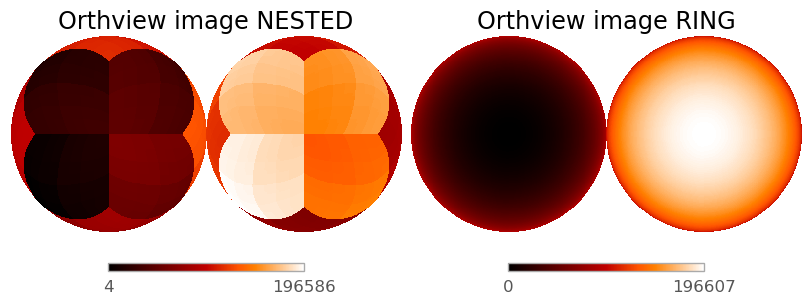

In [226]:
nside=128 
m_ring = np.arange(12*nside**2 )
hp.mollview(m_ring, nest=True, title="Mollview image NESTED",sub=121)
hp.mollview(m_ring,  title="Mollview image RING",sub=122)
plt.figure()
hp.orthview(m_ring, nest=True, rot=[0,90],title="Orthview image NESTED",sub=121)
hp.orthview(m_ring, rot=[0,90], title="Orthview image RING",sub=122)

## Plotting at IRIS maps( Miville-Deschênes and Lagache, 2005) 

The Infrared Astronomical Satellite (IRAS) had a tremendous impact on many areas of modern astrophysics. In particular it revealed the ubiquity of infrared cirrus that are a spectacular manifestation of the interstellar medium complexity but also an important foreground for observational cosmology. With the forthcoming Planck satellite there is a need for all-sky complementary data sets with arcminute resolution that can bring informations on specific foreground emissions that contaminate the Cosmic Microwave Background radiation. With its ~4' resolution matching perfectly the high-frequency bands of Planck, IRAS is a natural data set to study the variations of dust properties at all scales. But the latest version of the images delivered by the IRAS team (the ISSA plates) suffers from calibration, zero level and striping problems that can preclude its use, especially at 12 and 25 micron. In this paper we present how we proceeded to solve each of these problems and enhance significantly the general quality of the ISSA plates in the four bands (12, 25, 60 and 100 microns). 
This new generation of IRAS images, called IRIS, benefits from a better zodiacal light subtraction, from a calibration and zero level compatible with DIRBE, and from a better destriping.


The IRIS data products available here are HEALPix all-sky maps produced by Miville-Deschênes and Lagache.  Maps are available at Nside=1024 (3.4 arcminute pixels). (*Source: https://lambda.gsfc.nasa.gov/product/foreground/fg_iris_info.html*) 


In [185]:
import wget 
iris_file1="IRIS_nohole_1_1024_v2.fits"
iris_file2="IRIS_nohole_4_1024_v2.fits"
iris_file3="IRIS_nohole_3_1024_v2.fits"
try:
    iris_12um, header = hp.read_map(iris_file1 ,h=True  )
    iris_100um, header = hp.read_map(iris_file2 ,h=True  )
    iris_60um, header = hp.read_map(iris_file3 ,h=True  )
except FileNotFoundError : 
    iris_file3 = wget.download("https://lambda.gsfc.nasa.gov/data/foregrounds/iris/IRIS_nohole_3_1024_v2.fits")
    iris_file2 = wget.download("https://lambda.gsfc.nasa.gov/data/foregrounds/iris/IRIS_nohole_4_1024_v2.fits")
    iris_file1  = wget.download("https://lambda.gsfc.nasa.gov/data/foregrounds/iris/IRIS_nohole_1_1024_v2.fits") 
    
    iris_12um, header = hp.read_map(iris_file1 ,h=True  )
    iris_100um, header = hp.read_map(iris_file2 ,h=True  )
    iris_60um, header = hp.read_map(iris_file3 ,h=True  )

100% [........................................................................] 50339520 / 50339520

/var/folders/2y/7mtx094j2tb45h4cj42hcw8w0000gn/T/ipykernel_50695/548705902.py:2: RuntimeWarning: invalid value encountered in log10
  hp.mollview(np.log10(iris_12um), max=2,min=-0.3 ,sub=131 , title=r'IRIS 12 $\mu m$',cmap='Blues_r'  )
/var/folders/2y/7mtx094j2tb45h4cj42hcw8w0000gn/T/ipykernel_50695/548705902.py:5: RuntimeWarning: invalid value encountered in log10
  hp.mollview(np.log10(iris_60um), max=2 ,min=-0.3 ,sub=132, title=r'IRIS 60 $\mu m$', cmap='Greens_r'  )


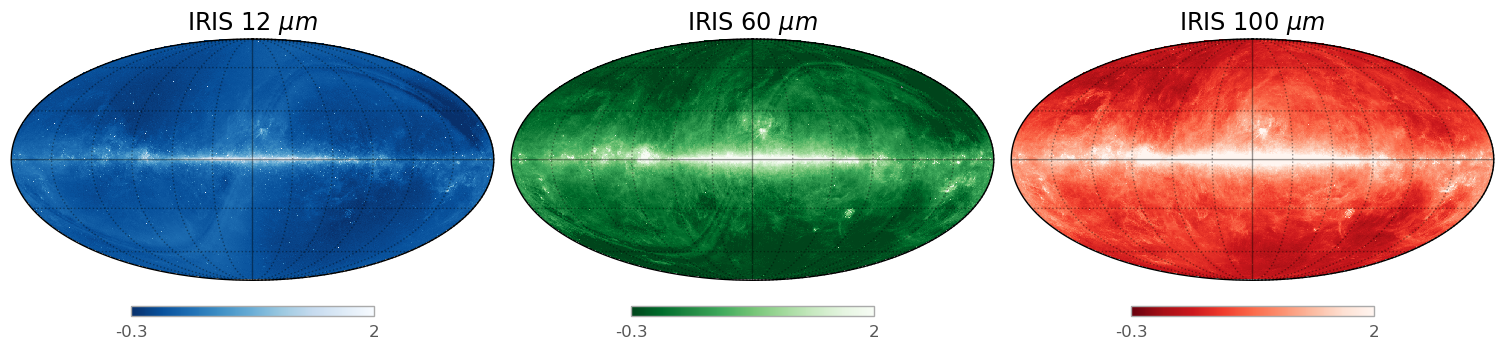

In [211]:
plt.figure(figsize=(15,5) )
hp.mollview(np.log10(iris_12um), max=2,min=-0.3 ,sub=131 , title=r'IRIS 12 $\mu m$',cmap='Blues_r'  )

hp.mollview(np.log10(iris_100um), max=2,min=-0.3  ,sub=133, title=r'IRIS 100 $\mu m$',cmap='Reds_r' )
hp.mollview(np.log10(iris_60um), max=2 ,min=-0.3 ,sub=132, title=r'IRIS 60 $\mu m$', cmap='Greens_r'  )
hp.graticule(alpha=.4)

### Let's combine all the 3 freq. bands into one single RGB map. 

In [212]:
import matplotlib
cmap_colors_red = plt.get_cmap('Reds_r', 256)(np.linspace(0, 1, 256))
cmap_colors_red[..., 3] = 0.5  # Make colormap partially transparent
cmap_red =  matplotlib.colors.ListedColormap(cmap_colors_red)
cmap_colors_green = plt.get_cmap('Greens_r', 256)(np.linspace(0, 1, 256))
cmap_colors_green[..., 3] = 0.5  # Make colormap partially transparent
cmap_green =  matplotlib.colors.ListedColormap(cmap_colors_green)
cmap_colors_blue = plt.get_cmap('Blues_r', 256)(np.linspace(0, 1, 256))
cmap_colors_blue[..., 3] = 0.5  # Make colormap partially transparent
cmap_blue =  matplotlib.colors.ListedColormap(cmap_colors_blue)

/var/folders/2y/7mtx094j2tb45h4cj42hcw8w0000gn/T/ipykernel_50695/2372637912.py:2: RuntimeWarning: invalid value encountered in log10
  hp.mollview(np.log10(iris_60um), min=-0.3,    max=2 ,cmap= cmap_green ,reuse_axes=True,cbar=False  )
/var/folders/2y/7mtx094j2tb45h4cj42hcw8w0000gn/T/ipykernel_50695/2372637912.py:3: RuntimeWarning: invalid value encountered in log10
  hp.mollview(np.log10(iris_12um), min=-0.3,    max=2 ,cmap= cmap_blue ,reuse_axes=True , cbar=False )


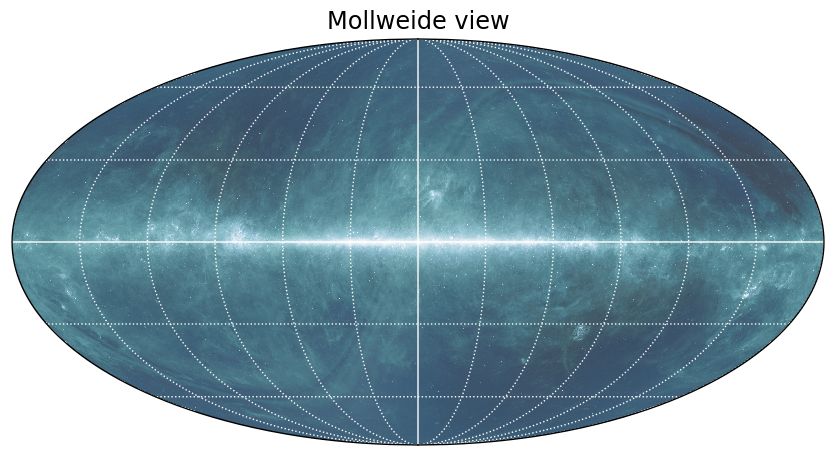

In [222]:
hp.mollview(np.log10(iris_100um),  min=-0.3,  max=2 ,cmap= cmap_red,cbar=False  )
hp.mollview(np.log10(iris_60um), min=-0.3,    max=2 ,cmap= cmap_green ,reuse_axes=True,cbar=False  )
hp.mollview(np.log10(iris_12um), min=-0.3,    max=2 ,cmap= cmap_blue ,reuse_axes=True , cbar=False )
hp.graticule(color='white') 

### Gnomonic projection 

if we want to do some zoom in. 

/var/folders/2y/7mtx094j2tb45h4cj42hcw8w0000gn/T/ipykernel_50695/1554125491.py:2: RuntimeWarning: invalid value encountered in log10
  hp.gnomview(np.log10(iris_60um), min=-0.3,    max=2 ,cmap= cmap_green ,reuse_axes=True,cbar=False  ,rot=[300,-40], xsize=320, reso=3.75)
/var/folders/2y/7mtx094j2tb45h4cj42hcw8w0000gn/T/ipykernel_50695/1554125491.py:3: RuntimeWarning: invalid value encountered in log10
  hp.gnomview(np.log10(iris_12um), min=-0.3,    max=2 ,cmap= cmap_blue ,reuse_axes=True , cbar=False ,rot=[300,-40], xsize=320, reso=3.75)


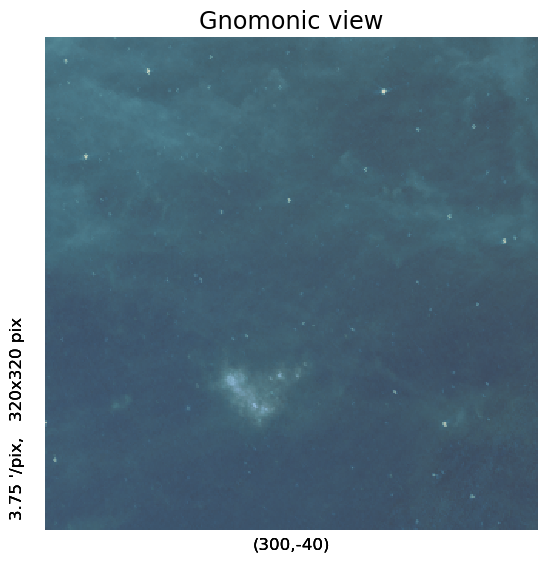

In [225]:
hp.gnomview(np.log10(iris_100um),  min=-0.3,  max=2 ,cmap= cmap_red,cbar=False,rot=[300,-40], xsize=320, reso=3.75  )
hp.gnomview(np.log10(iris_60um), min=-0.3,    max=2 ,cmap= cmap_green ,reuse_axes=True,cbar=False  ,rot=[300,-40], xsize=320, reso=3.75)
hp.gnomview(np.log10(iris_12um), min=-0.3,    max=2 ,cmap= cmap_blue ,reuse_axes=True , cbar=False ,rot=[300,-40], xsize=320, reso=3.75)